### 关于数据集 | About Dataset

https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data

#### 背景 | Context

What’s the best (or at least the most popular) Halloween candy?

#### 内容 | Content

在Candy.csv中包含了每种糖果的属性及其排名。对于二元变量，1表示“是”，0表示“否”。

- chocolate: Does it contain Chocolate?
  - 是否含有巧克力
- fruity: Is it fruit flavored?
  - 是否是水果味的？
- caramel: Is there caramel in the candy?
  - 是否含有焦糖？
- peanutalmondy (peanuts, peanut butter, almonds)
  - 花生杏仁类（是否含有花生、花生酱或杏仁？）
- nougat: Does it contain nougat?
  - 是否含有牛轧糖？
- crispedricewafer (crisped rice, wafers, cookie)
  - 脆米威化饼（是否含有脆米、威化饼或饼干成分？）
- hard: Is it a hard candy?
  - 是否坚硬？
- bar: Is it a candy bar?
  - 是否是棒状的？
- pluribus: Is it one of many candies in a bag or box?
  - 是否是一袋或一盒中的一个？
- sugarpercent: The percentile of sugar it falls under within the data set.
  - 含糖量百分比：在数据集中其含糖量所处的百分比区间。
- pricepercent: The unit price percentile compared to the rest of the set.
  - 价格百分比：与该组其他产品相比的单价百分位数。
- winpercent: The overall win percentage according to 269,000 matchups.
  - 胜率：根据26.9万投票得出的总胜率。

---

#### 主要目标 | Paimary objective

- 通过利用不同的分类模型，并结合糖果的附加特征，来预测该糖果是否以巧克力为基础。

- Utilizing a different classification Model to predict whether a candy is Chocolate-based, leveraging its additional features.


---

### 实例

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


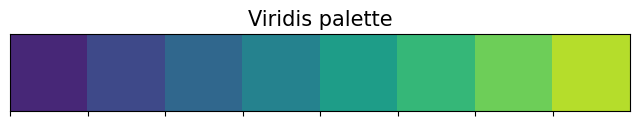

In [14]:
def viridis_palette():
    sns.palplot(sns.color_palette("viridis", 8))
    plt.title("Viridis palette", fontsize = 15)
    plt.show()

viridis_palette()

In [15]:
df = pd.read_csv("Candy.csv")


---

#### 1.数据预处理 | Data Preprocessing

---

In [20]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [ ]:
df.isnull().sum()


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Luckily, we don't have any missing values.

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


---

#### 2.探索性数据分析 | Exploratory Data Analysis

---

This will be an EXPLORATORY (探索性) visualization, as opposed to EXPLANATORY (解释性).

| **特征**         | **探索性可视化 (EXPLORATORY)**              | **解释性可视化 (EXPLANATORY)**            |
|------------------|-------------------------------------------|------------------------------------------|
| **核心目标**     | 理解数据、寻找模式、发现线索、形成假设       | 清晰传达特定发现、故事、结论或论点         |
| **受众**         | 你自己或小团队（分析师、数据科学家）         | 更广泛的受众（管理者、客户、公众、决策者） |
| **交互性**       | 高（过滤、缩放、下钻、悬停查看详情）         | 低（通常为静态图表或预设动线）             |
| **复杂度**       | 可接受较高（多视图、复杂图表、原始数据点）    | 力求简洁（突出关键信息，避免干扰）         |
| **数据呈现**     | 常显示更多原始数据点、分布、不确定性         | 强调聚合、摘要、趋势线、关键指标         |
| **外观打磨**     | 相对粗糙（标签、颜色可能不完美）             | 高度打磨（清晰标注、吸引人、品牌一致）     |
| **核心问题**     | “数据里有什么？” “发生了什么？”             | “这意味着什么？” “为什么重要？” “该怎么做？” |
| **类比**         | 侦探在案发现场搜寻线索                     | 侦探在法庭上展示证据和推理                 |



**探索性：**

- 数据分析**前期**的工作
- 面对的是一个（相对）未知的数据集，或者一个模糊的问题。
- 目标不是给出最终答案，而是
  - 了解数据的结构、分布、范围和质量（是否存在缺失值、异常值？）。
  - 识别潜在的模式、趋势、关联性或聚类。
  - 发现意料之外的见解或异常值。
  - 提出后续需要深入研究的问题。
  - 形成关于数据背后故事或机制的初步假设。

特点
- 高交互性：交互性是快速迭代和深入探索的基础。
- 更“原始”的数据
- 多视图
- 尝试性
- 不那么“完美：快速看到数据“说什么”

设定预期：这些图表是我在摸索过程中画的，目的是找出线索，它们可能不完美，也不代表最终结论。
避免误解： 防止别人把探索过程中不成熟或存在误导的视图当作确定的结论。

> 我（或我们）正在使用可视化作为工具来主动挖掘、调查和理解数据，寻找隐藏的模式和故事起点。这些视图是过程性的、交互性强的、可能比较‘粗糙’，主要用于分析和形成洞见，而不是用于最终的展示或说服他人

Rename the columns for better understanding and aesthetics.

In [25]:
mapping = {
    "competitorname": "Candy Name",
    "chocolate": "Chocolate",
    "fruity": "Fruity",
    "caramel": "Caramel",
    "peanutalmondy": "Peanuts & Nuts",
    "nougat": "Nougat",
    "crispedricewafer": "Crispy",
    "hard": "Hard Candy",
    "bar": "Candy Bar",
    "pluribus": "Multi-piece",
    "sugarpercent": "Sugar Percentage",
    "pricepercent": "Price Percentage",
    "winpercent": "Win Percentage",
}
df = df.rename(columns = mapping)


In [26]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")


Candy Name,Chocolate,Fruity,Caramel,peanutyalmondy,Nougat,Crispy,Hard Candy,Candy Bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [55]:
def plot_choc_candy_ratio(df):
    
    choc_ratio = df["Chocolate"].mean().round(2)
    candy_ratio = 1 - choc_ratio

    fig, ax = plt.subplots(figsize = (8, 2))

    ax.barh([''], [candy_ratio], color = "#472777", alpha = 0.9, label = "Candy")
    ax.barh([''], [choc_ratio], left=[candy_ratio], color = "#35b778", alpha = 0.9, label = "Chocolate")

    ax.annotate(
        f"{int(candy_ratio * 100)}%", 
        xy = (candy_ratio / 2, 0), 
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )
    ax.annotate(
        f"{int(choc_ratio * 100)}%",
        xy = (candy_ratio + choc_ratio / 2, 0),
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )

    ax.set_title("Candy & Chocolate", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.legend(loc = "upper center", fontsize = 15, bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()


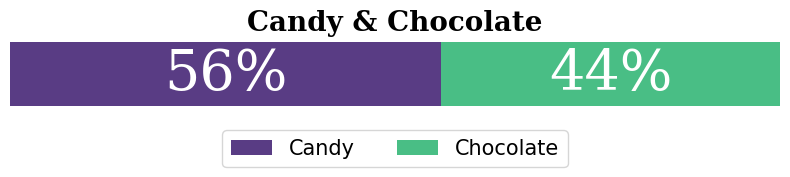

In [56]:
plot_choc_candy_ratio(df)
